In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
from fastai.vision import *
from fastai.metrics import error_rate,accuracy,fbeta

In [0]:
path = os.getcwd()

In [3]:
import shutil
shutil.copy('/content/drive/My Drive/PlantVillage.tar.gz','/content')

'/content/PlantVillage.tar.gz'

In [0]:
!tar -xf '/content/PlantVillage.tar.gz'

In [5]:
!ls

drive  PlantVillage  PlantVillage.tar.gz  sample_data


In [0]:
data_dir = path + "/PlantVillage"
train_data_dir = path + "/PlantVillage/train"
validation_data_dir = path + "/PlantVillage/val"


In [7]:
x=[]
x=[i for i in os.listdir('PlantVillage/train/')]
x

['Pepper,_bell___Bacterial_spot',
 'Strawberry___healthy',
 'Blueberry___healthy',
 'Pepper,_bell___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Potato___Early_blight',
 'Tomato___Late_blight',
 'Peach___healthy',
 'background',
 'Tomato___Target_Spot',
 'Grape___Black_rot',
 'Cherry_(including_sour)___Powdery_mildew',
 'Apple___Cedar_apple_rust',
 'Potato___healthy',
 'Squash___Powdery_mildew',
 'Corn_(maize)___healthy',
 'Tomato___Early_blight',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___Leaf_Mold',
 'Apple___Apple_scab',
 'Grape___Esca_(Black_Measles)',
 'Corn_(maize)___Common_rust_',
 'Raspberry___healthy',
 'Tomato___Bacterial_spot',
 'Soybean___healthy',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Apple___Black_rot',
 'Tomato___Septoria_leaf_spot',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Peach___Bacterial_sp

In [8]:
!ls PlantVillage/train/Apple___Apple_scab

'01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG'
'01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG'
'0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037.JPG'
'023123cb-7b69-4c9f-a521-766d7c8543bb___FREC_Scab 3487.JPG'
'0261a6e4-21f8-481a-8827-b674e6955644___FREC_Scab 3055.JPG'
'029424b0-0ef5-491b-9ef5-069190d24d8f___FREC_Scab 3504.JPG'
'0340dc35-5215-48ab-8db7-06af99fcb358___FREC_Scab 2966.JPG'
'03eccb1a-0368-4ac7-9f48-7546037b775a___FREC_Scab 3334.JPG'
'0537ad56-3d24-4e97-a947-65b9b37f8988___FREC_Scab 3079.JPG'
'058d5e64-2c57-45ba-94cb-ac83fd1885a0___FREC_Scab 3181.JPG'
'0631708e-5bac-4611-8ff9-6d5ee87ce3b3___FREC_Scab 3252.JPG'
'0672ab32-9fce-41f3-ae69-e39c48a0a292___FREC_Scab 3347.JPG'
'06cf74b6-d895-4a09-b3b1-bc63579f8c33___FREC_Scab 3128.JPG'
'073b509f-c1ea-4e61-881b-2e874c5f4199___FREC_Scab 3286.JPG'
'075b1885-250b-4b3e-8168-e54efdbb04e8___FREC_Scab 3173.JPG'
'0812e1e4-6d1b-4264-8f23-6519354fc5a6___FREC_Scab 3293.JPG'
'0896ecbc-1af2-4868-8279-ed302acb29bc___

In [0]:
bs = 64
data = ImageDataBunch.from_folder(data_dir,
                                  train="train",
                                  valid="val",ds_tfms=get_transforms(),
                                  classes=x,size=256, bs=bs)


In [10]:
data

ImageDataBunch;

Train: LabelList (44016 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Pepper,_bell___Bacterial_spot,Pepper,_bell___Bacterial_spot,Pepper,_bell___Bacterial_spot,Pepper,_bell___Bacterial_spot,Pepper,_bell___Bacterial_spot
Path: /content/PlantVillage;

Valid: LabelList (11004 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Pepper,_bell___Bacterial_spot,Pepper,_bell___Bacterial_spot,Pepper,_bell___Bacterial_spot,Pepper,_bell___Bacterial_spot,Pepper,_bell___Bacterial_spot
Path: /content/PlantVillage;

Test: None

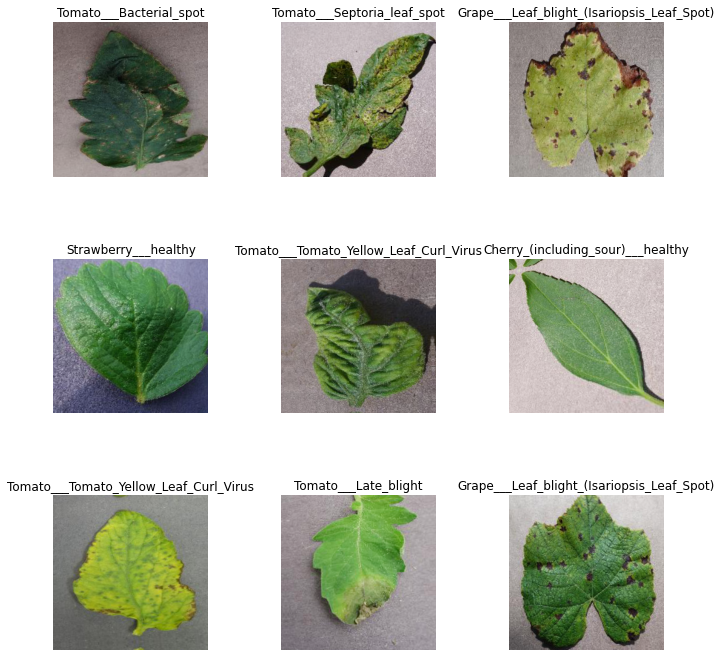

In [11]:
data.show_batch(rows=3, figsize=(10,10))

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [13]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.370227,0.186386,0.058161,09:25
1,0.192228,0.118879,0.037532,09:21
2,0.154524,0.078698,0.023446,09:26
3,0.115206,0.081764,0.025082,09:33
4,0.087447,0.037815,0.010723,09:34
5,0.068464,0.032069,0.010451,09:33
6,0.043775,0.029657,0.009088,09:33
7,0.033037,0.027992,0.008361,09:31
8,0.031003,0.025562,0.008270,09:29
9,0.029112,0.023553,0.006816,09:28


In [14]:
interp = ClassificationInterpretation.from_learner(learn)

In [15]:
interp.most_confused(min_val=2)

[('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  12),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  11),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 7),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 4),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus',
  'Tomato___Spider_mites Two-spotted_spider_mite',
  3),
 ('Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 3),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 3),
 ('Potato___Late_blight', 'Tomato___Late_blight', 3),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 2),
 ('Tomato___Bacterial_spot', 'Tomato___Target_Spot', 2)]

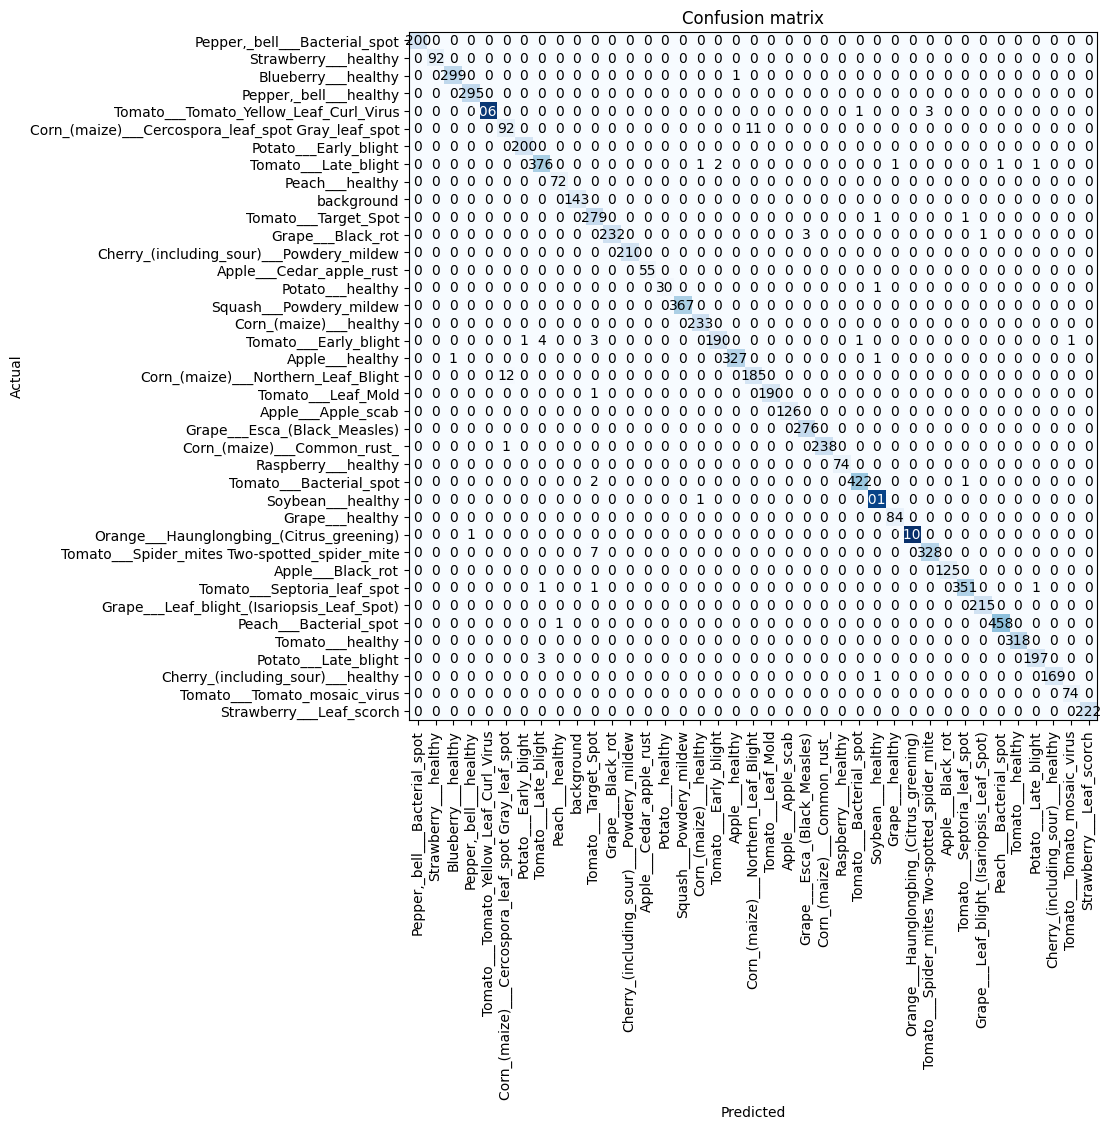

In [16]:
interp.plot_confusion_matrix(figsize=(11,15), dpi=100)

In [0]:
learn.save(path+'/stage-1')